# Recognition of handwritten digit: A neural network approach

Handwritten digit recognition is a good first-lesson on image recognition for beginners.
<br />  
The MNIST dataset consists 60000 training examples and 10000 test examples, of digits 0-9, can be downloaded from [Yann Lecun's website](http://yann.lecun.com/exdb/mnist/).
<br />  
In this project we will:

- Implement a 2-layer neural network.
- Compute the forward pass and backward pass with svm loss.
- Use the normlizaiton to help network converge.
- Use a stochastic gradient descent to optimize the loss function.

In [1]:
from data_utils import loadMNIST

from __future__ import print_function
from two_layer_net import *
from three_layer_net import *

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Load the data
Load the MNIST data to train a neural network. The data is located at `'dataset/'` directory, you should download the 4 ubyte files from [Yann Lecun's website](http://yann.lecun.com/exdb/mnist/) and unextract it in the right directory before loading. Dataset directory may vary when you change the location of you project folder, or use a different operating system. Make sure to modify `data_utils.py` when you change the dataset location.

In [2]:
X_train, y_train = loadMNIST(dataset="training", num_image=60000)
X_test, y_test = loadMNIST(dataset="test", num_image=10000)

print("Loaded training images of shape:", X_train.shape)
print("Loaded training labels of shape:", y_train.shape)
print("Loaded test images of shape", X_test.shape)
print("Loaded test labels of shape", y_test.shape)

Loaded training images of shape: (60000, 28, 28)
Loaded training labels of shape: (60000,)
Loaded test images of shape (10000, 28, 28)
Loaded test labels of shape (10000,)


# Show some random images
Show some random images to get a gut feeling of how the data looks like.
Make sure `row * col` is less than the size of training set example number.
To adjust the size of plot size, just modify: `plt.rcParams['figure.figsize']` on the first code block.

IndexError: too many indices for array

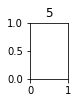

In [50]:
row, col = 5, 10
idx = np.random.choice(X_train.shape[0], row*col, replace=False)
for i in range(row):
    for j in range(col):
        plt_idx = idx[i*col+j]
        plt.subplot(row, col, i*col+j+1)
        plt.title(y_train[plt_idx])
        plt.imshow(X_train[plt_idx,:,:])
        plt.axis('off')

plt.show()

# Preprocess the data
## Part.1
In this part, we preprocess the data by:

- Split training set data to train and validation.
- Normalize the data

In [3]:
X_train, y_train = loadMNIST(dataset="training", num_image=60000)
X_test, y_test = loadMNIST(dataset="test", num_image=10000)

# Split the data into train, val, and test sets. 
num_training = 50000
num_validation = 10000
num_test = 10000

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]


# Normalize the data: subtract the mean image
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image


print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (50000, 28, 28)
Train labels shape:  (50000,)
Validation data shape:  (10000, 28, 28)
Validation labels shape:  (10000,)
Test data shape:  (10000, 28, 28)
Test labels shape:  (10000,)


## Part.2
Reshape the 3 dimension data to a `[N * (row * col)]` 2 dimension matrix.
`N` is the number of examples, `(row, col)` is the shape of an example image.

In [4]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (50000, 784)
Validation data shape:  (10000, 784)
Test data shape:  (10000, 784)


# Overfit Small Dataset
Training with a small dataset, i.e. a training set with 500 example images, we should see an overfitting model.

In [5]:
# Preprocessing: reshape the image data into rows
X_train_small = X_train[:500, :]
y_train_small = y_train[:500]
# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train_small.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (500, 784)
Validation data shape:  (10000, 784)
Test data shape:  (10000, 784)


In [15]:
input_size = 28 * 28
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train_small, y_train_small, X_val, y_val,
            num_iters=1000, batch_size=50,
            learning_rate=1e-4, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
train_acc = (net.predict(X_train_small) == y_train_small).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 1000: loss 9.000105 val_acc 0.156000
iteration 100 / 1000: loss 1.598976 val_acc 0.699100
iteration 200 / 1000: loss 0.596358 val_acc 0.819000
iteration 300 / 1000: loss 0.144625 val_acc 0.839700
iteration 400 / 1000: loss 0.134965 val_acc 0.848800
iteration 500 / 1000: loss 0.071468 val_acc 0.851200
iteration 600 / 1000: loss 0.127277 val_acc 0.853200
iteration 700 / 1000: loss 0.074162 val_acc 0.853100
iteration 800 / 1000: loss 0.033737 val_acc 0.856200
iteration 900 / 1000: loss 0.071266 val_acc 0.856100
Validation accuracy:  0.8563
Train accuracy:  0.998


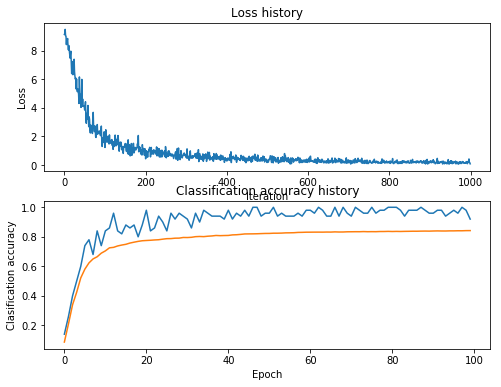

In [49]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

# Training
Train a two layer neural network, update gradients with mini-batch data, optimize the loss with SGD.


In [61]:
input_size = 28 * 28
hidden_size = 200
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=20000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
train_acc = (net.predict(X_train) == y_train).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 20000: loss 9.000253 val_acc 0.268400
iteration 100 / 20000: loss 1.430361 val_acc 0.807000
iteration 200 / 20000: loss 0.881964 val_acc 0.882500
iteration 300 / 20000: loss 0.463666 val_acc 0.897900
iteration 400 / 20000: loss 0.564050 val_acc 0.907900
iteration 500 / 20000: loss 0.439043 val_acc 0.913700
iteration 600 / 20000: loss 0.377167 val_acc 0.919100
iteration 700 / 20000: loss 0.286834 val_acc 0.924100
iteration 800 / 20000: loss 0.472871 val_acc 0.926200
iteration 900 / 20000: loss 0.358269 val_acc 0.927600
iteration 1000 / 20000: loss 0.515192 val_acc 0.930400
iteration 1100 / 20000: loss 0.220007 val_acc 0.933400
iteration 1200 / 20000: loss 0.377677 val_acc 0.935200
iteration 1300 / 20000: loss 0.252128 val_acc 0.935500
iteration 1400 / 20000: loss 0.264801 val_acc 0.938500
iteration 1500 / 20000: loss 0.243509 val_acc 0.938700
iteration 1600 / 20000: loss 0.313286 val_acc 0.941500
iteration 1700 / 20000: loss 0.320593 val_acc 0.942500
iteration 1800 / 20000

iteration 14900 / 20000: loss 0.177406 val_acc 0.975900
iteration 15000 / 20000: loss 0.159052 val_acc 0.975400
iteration 15100 / 20000: loss 0.139550 val_acc 0.975500
iteration 15200 / 20000: loss 0.146758 val_acc 0.975500
iteration 15300 / 20000: loss 0.194657 val_acc 0.975900
iteration 15400 / 20000: loss 0.125144 val_acc 0.976400
iteration 15500 / 20000: loss 0.145259 val_acc 0.976200
iteration 15600 / 20000: loss 0.095809 val_acc 0.975600
iteration 15700 / 20000: loss 0.135604 val_acc 0.975200
iteration 15800 / 20000: loss 0.142998 val_acc 0.975600
iteration 15900 / 20000: loss 0.120985 val_acc 0.975700
iteration 16000 / 20000: loss 0.199405 val_acc 0.975800
iteration 16100 / 20000: loss 0.141665 val_acc 0.976200
iteration 16200 / 20000: loss 0.142575 val_acc 0.976000
iteration 16300 / 20000: loss 0.139592 val_acc 0.976000
iteration 16400 / 20000: loss 0.125685 val_acc 0.976300
iteration 16500 / 20000: loss 0.175387 val_acc 0.976100
iteration 16600 / 20000: loss 0.160000 val_acc 0

# Debug the training
The loss history indicates whether loss is converging.
Overfitting or underfitting can be observed from classification accuracy history.
If there is a big gap between training accuracy and validation accuracy curves, the model is highly possible overfitting. Else if the training accuracy is low, and validation accuracy alike, the model might be underfitting.
To avoid such occasions, fine tune the parameters with your observation on the plots.

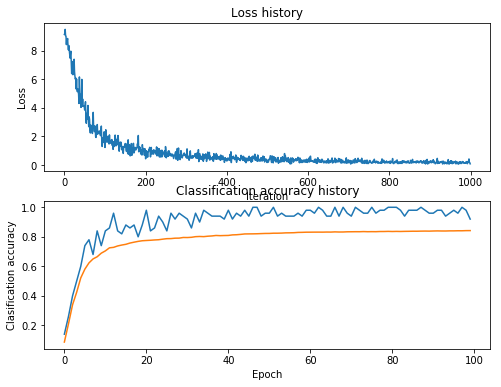

In [47]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

# Performance of the model
Now it's time to finally evaluate our model, with test set data.

In [63]:
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.9763


# Show some random image and predict using our model

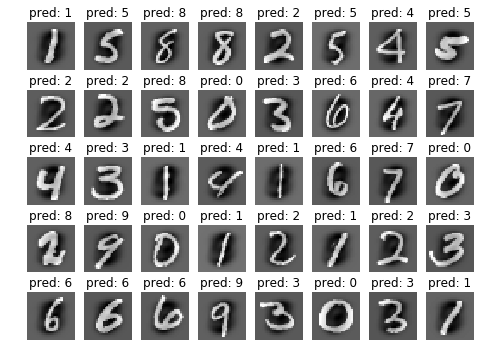

In [45]:
row, col = 5, 8
y_test_pred = net.predict(X_test)
X_test_image = X_test.reshape(-1, 28, 28)
idx = np.random.choice(X_test.shape[0], row*col, replace=False)
for i in range(row):
    for j in range(col):
        plt_idx = idx[i*col+j]
        plt.subplot(row, col, i*col+j+1)
        plt.title('pred: ' + str(y_test_pred[plt_idx]))
        plt.imshow(X_test_image[plt_idx,:,:])
        plt.axis('off')

plt.show()

# Use a Residual Block
The 2-layer plain neural network has achieved a accuracy of 97.2%, in this section we will add a shortcut to bypass the the two layers, thus feed the input directly to svm loss function.

In [54]:
input_size = 28 * 28
hidden_size = 200
hidden2_size = 200
num_classes = 10
net = ThreeLayerNet(input_size, hidden_size, hidden2_size, num_classes, std = 0.01, use_Res=True)

# Train the network
stats = net.train(X_train_small, y_train_small, X_val, y_val,
            num_iters=1000, batch_size=50,
            learning_rate=1e-4, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
train_acc = (net.predict(X_train_small) == y_train_small).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 1000: loss 23.391712 val_acc 0.212000
iteration 100 / 1000: loss 8.891242 val_acc 0.740700
iteration 200 / 1000: loss 8.784740 val_acc 0.748200
iteration 300 / 1000: loss 8.747191 val_acc 0.749500
iteration 400 / 1000: loss 8.713391 val_acc 0.751600
iteration 500 / 1000: loss 8.683003 val_acc 0.751700
iteration 600 / 1000: loss 8.655688 val_acc 0.751000
iteration 700 / 1000: loss 8.631119 val_acc 0.751000
iteration 800 / 1000: loss 8.609008 val_acc 0.750900
iteration 900 / 1000: loss 8.589100 val_acc 0.750900
Validation accuracy:  0.7508
Train accuracy:  1.0


In [55]:
input_size = 28 * 28
hidden_size = 200
hidden2_size = 200
num_classes = 10
net = ThreeLayerNet(input_size, hidden_size, hidden2_size, num_classes, std = 0.01, use_Res=False)

# Train the network
stats = net.train(X_train_small, y_train_small, X_val, y_val,
            num_iters=1000, batch_size=50,
            learning_rate=1e-4, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
train_acc = (net.predict(X_train_small) == y_train_small).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 1000: loss 14.383644 val_acc 0.096200
iteration 100 / 1000: loss 6.537336 val_acc 0.716400
iteration 200 / 1000: loss 5.789436 val_acc 0.766800
iteration 300 / 1000: loss 5.904385 val_acc 0.794300
iteration 400 / 1000: loss 5.488999 val_acc 0.807500
iteration 500 / 1000: loss 5.341890 val_acc 0.816200
iteration 600 / 1000: loss 5.078296 val_acc 0.824100
iteration 700 / 1000: loss 5.041621 val_acc 0.829100
iteration 800 / 1000: loss 5.162288 val_acc 0.830500
iteration 900 / 1000: loss 4.980743 val_acc 0.832000
Validation accuracy:  0.8334
Train accuracy:  0.986


In [56]:
input_size = 28 * 28
hidden_size = 200
hidden2_size = 200
num_classes = 10
net = ThreeLayerNet(input_size, hidden_size, hidden2_size, num_classes, std = 0.01, use_Res=False)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=15000, batch_size=50,
            learning_rate=1e-4, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
train_acc = (net.predict(X_train_small) == y_train_small).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 15000: loss 14.472184 val_acc 0.069800
iteration 100 / 15000: loss 7.369236 val_acc 0.790400
iteration 200 / 15000: loss 6.177655 val_acc 0.850900
iteration 300 / 15000: loss 6.005511 val_acc 0.872900
iteration 400 / 15000: loss 5.525551 val_acc 0.883500
iteration 500 / 15000: loss 5.717867 val_acc 0.894800
iteration 600 / 15000: loss 5.748199 val_acc 0.900900
iteration 700 / 15000: loss 5.073751 val_acc 0.904400
iteration 800 / 15000: loss 5.279585 val_acc 0.906900
iteration 900 / 15000: loss 5.106162 val_acc 0.911100
iteration 1000 / 15000: loss 5.043898 val_acc 0.914600
iteration 1100 / 15000: loss 4.952129 val_acc 0.918300
iteration 1200 / 15000: loss 4.691234 val_acc 0.920300
iteration 1300 / 15000: loss 5.300687 val_acc 0.921800
iteration 1400 / 15000: loss 4.618787 val_acc 0.923400
iteration 1500 / 15000: loss 4.644103 val_acc 0.924000
iteration 1600 / 15000: loss 4.558806 val_acc 0.925300
iteration 1700 / 15000: loss 4.879322 val_acc 0.928000
iteration 1800 / 1500

iteration 14900 / 15000: loss 1.679507 val_acc 0.965600
Validation accuracy:  0.9654
Train accuracy:  0.964


In [57]:
input_size = 28 * 28
hidden_size = 200
hidden2_size = 200
num_classes = 10
net = ThreeLayerNet(input_size, hidden_size, hidden2_size, num_classes, std = 0.01, use_Res=True)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=15000, batch_size=50,
            learning_rate=1e-4, learning_rate_decay=0.99,
            reg=0.5, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
train_acc = (net.predict(X_train_small) == y_train_small).mean()
print('Validation accuracy: ', val_acc)
print('Train accuracy: ', train_acc)

iteration 0 / 15000: loss 25.282472 val_acc 0.154300
iteration 100 / 15000: loss 10.031329 val_acc 0.851800
iteration 200 / 15000: loss 9.526344 val_acc 0.884200
iteration 300 / 15000: loss 9.673745 val_acc 0.898300
iteration 400 / 15000: loss 9.133065 val_acc 0.904600
iteration 500 / 15000: loss 8.770422 val_acc 0.908700
iteration 600 / 15000: loss 8.685816 val_acc 0.919500
iteration 700 / 15000: loss 8.663434 val_acc 0.922500
iteration 800 / 15000: loss 8.852103 val_acc 0.927700
iteration 900 / 15000: loss 9.033688 val_acc 0.929900
iteration 1000 / 15000: loss 8.864487 val_acc 0.929600
iteration 1100 / 15000: loss 8.748226 val_acc 0.931900
iteration 1200 / 15000: loss 8.459251 val_acc 0.935200
iteration 1300 / 15000: loss 8.728459 val_acc 0.935500
iteration 1400 / 15000: loss 8.577449 val_acc 0.937500
iteration 1500 / 15000: loss 8.308660 val_acc 0.940700
iteration 1600 / 15000: loss 8.636741 val_acc 0.942100
iteration 1700 / 15000: loss 8.197351 val_acc 0.945300
iteration 1800 / 150

iteration 14900 / 15000: loss 5.335850 val_acc 0.969000
Validation accuracy:  0.9689
Train accuracy:  0.988


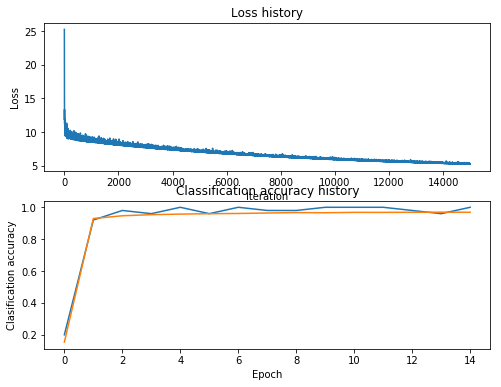

In [58]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [59]:
test_acc = (net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.9655


# Acknowledgment
Some of the code and structure is copied from Stanford course [CS231n](https://cs231n.github.io) assignments. Lectured by Fei-Fei Li, Andrej Karpathy, Justion Johnson and Serena Yeung